In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
from keras_facenet import FaceNet

# Load FaceNet model
embedder = FaceNet()

# display model summary
embedder.model.summary()

Model: "inception_resnet_v1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_1a_3x3       │ (None, None,      │        864 │ input_layer[0][0] │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_1a_3x3_Batc… │ (None, None,      │         96 │ Conv2d_1a_3x3[0]… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_1a_3x3_Acti… │ (None, None,      │          0 │ Conv2d_1a_3x3_Ba… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_2a_3x3       │ (None, None,      │      9,216 │ Conv2d_1a_3x3_Ac… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_2a_3x3_Batc… │ (None, None,      │         96 │ Conv2d_2a_3x3[0]… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_2a_3x3_Acti… │ (None, None,      │          0 │ Conv2d_2a_3x3_Ba… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_2b_3x3       │ (None, None,      │     18,432 │ Conv2d_2a_3x3_Ac… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_2b_3x3_Batc… │ (None, None,      │        192 │ Conv2d_2b_3x3[0]… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_2b_3x3_Acti… │ (None, None,      │          0 │ Conv2d_2b_3x3_Ba… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MaxPool_3a_3x3      │ (None, None,      │          0 │ Conv2d_2b_3x3_Ac… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_3b_1x1       │ (None, None,      │      5,120 │ MaxPool_3a_3x3[0… │
│ (Conv2D)            │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_3b_1x1_Batc… │ (None, None,      │        240 │ Conv2d_3b_1x1[0]… │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_3b_1x1_Acti… │ (None, None,      │          0 │ Conv2d_3b_1x1_Ba… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_4a_3x3       │ (None, None,      │    138,240 │ Conv2d_3b_1x1_Ac… │
│ (Conv2D)            │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_4a_3x3_Batc… │ (None, None,      │        576 │ Conv2d_4a_3x3[0]… │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2d_4a_3x3_Acti… │ (None, None,      │          0 │ Conv2d_4a_3x3_Ba

 Total params: 23,497,424 (89.64 MB)

 Trainable params: 23,467,824 (89.52 MB)

 Non-trainable params: 29,600 (115.62 KB)

In [12]:
def img_to_encoding(image_path,model):
    # Opens the image in RGB format (3 color channels).
    img = Image.open(image_path).convert('RGB')
    # Resizes it to 160x160 pixels (FaceNet's expected input size).
    img = img.resize((160,160))

    # Converts the image into a NumPy array.
    # Divides by 255 to scale pixel values to [0, 1] (normalization).
    img_array = np.array(img).astype('float32')/255.0

    # Adds a dimension to make the shape (1, 160, 160, 3) → needed because models expect a batch of images, even if it’s just one image.
    img_array = np.expand_dims(img_array,axis=0)

    # Sends the image to the model.
    # The model returns a 128-dimensional vector representing the face (called an embedding).
    embedding = model.predict(img_array)

    # Ensures the vector has a length (L2 norm) of 1.
    # Normalization helps in comparing face vectors more reliably (distance is meaningful).
    embedding = embedding / np.linalg.norm(embedding)

    # Gives back the face encoding so it can be used for recognition (e.g., to compare with other faces).
    return embedding



In [ ]:
# Assuming embedder.model is already loaded
# Creates an empty dictionary named database.
# This will store person names as keys and their face embeddings as values.
database = {}
# Reads the image file: "images/danielle.png"
# Passes it to img_to_encoding()
# Gets a 128-length face encoding
# Stores that vector in the database under the name "danielle"
database["danielle"] = img_to_encoding("images/danielle.png", embedder.model)
database["younes"] = img_to_encoding("images/younes.jpg", embedder.model)
database["tian"] = img_to_encoding("images/tian.jpg", embedder.model)
database["andrew"] = img_to_encoding("images/andrew.jpg", embedder.model)
database["kian"] = img_to_encoding("images/kian.jpg", embedder.model)
database["dan"] = img_to_encoding("images/dan.jpg", embedder.model)
database["sebastiano"] = img_to_encoding("images/sebastiano.jpg", embedder.model)
database["bertrand"] = img_to_encoding("images/bertrand.jpg", embedder.model)
database["kevin"] = img_to_encoding("images/kevin.jpg", embedder.model)
database["felix"] = img_to_encoding("images/felix.jpg", embedder.model)
database["benoit"] = img_to_encoding("images/benoit.jpg", embedder.model)
database["arnaud"] = img_to_encoding("images/arnaud.jpg", embedder.model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [14]:

danielle = tf.keras.preprocessing.image.load_img("images/danielle.png", target_size=(160, 160))
kian = tf.keras.preprocessing.image.load_img("images/kian.jpg", target_size=(160, 160))

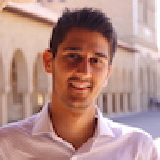

In [15]:
kian

In [16]:

benoit = tf.keras.preprocessing.image.load_img("images/benoit.jpg", target_size=(160, 160))
np.around(np.array(benoit) / 255.0, decimals=12).shape

(160, 160, 3)

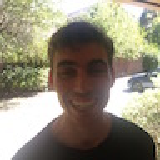

In [17]:

benoit

In [18]:
np.around(np.array(danielle) / 255.0, decimals=12).shape

(160, 160, 3)

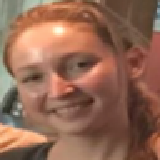

In [19]:
danielle

In [20]:
def verify(image_path,identity,database,model):
    """
    Verifies if the person in image_path is the claimed identity.

    Arguments:
        image_path -- string, path to the image to verify
        identity -- string, name of the person to verify against
        database -- dict, mapping names to face encodings
        model -- the FaceNet model (embedder.model)

    Returns:
        dist -- float, distance between image encoding and stored encoding
        door_open -- bool, True if match is accepted
    """

    # Step 1: Compute the encoding of the input image
    encoding = img_to_encoding(image_path,model)

    # Step 2: Get stored encoding and compute distance
    dist = np.linalg.norm(encoding-database[identity])

    # Step 3: Decision logic
    if dist < 0.7:
        print(f"✅ It's {identity}, welcome in!")
        door_open = True
    else:
        print(f"❌ It's not {identity}, please go away!")
        door_open = False
    
    return dist, door_open


In [21]:
# Replace FRmodel with embedder.model
verify("images/camera_1.jpg", "bertrand", database, embedder.model)
verify("images/camera_3.jpg", "bertrand", database, embedder.model)
verify("images/camera_1.jpg", "younes", database, embedder.model)
verify("images/camera_3.jpg", "younes", database, embedder.model)
verify("images/camera_0.jpg", "younes", database, embedder.model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
❌ It's not bertrand, please go away!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
❌ It's not bertrand, please go away!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
❌ It's not younes, please go away!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
❌ It's not younes, please go away!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
✅ It's younes, welcome in!


(np.float32(0.5490202), True)

In [22]:
verify("images/camera_2.jpg", "kian", database, embedder.model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
❌ It's not kian, please go away!


(np.float32(1.3686925), False)

In [23]:
verify("images/andrew.jpg", "andrew", database, embedder.model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
✅ It's andrew, welcome in!


(np.float32(0.0), True)

In [ ]:
def who_is_it(image_path,database,model):
    """
    Identifies the person in the image by comparing with the database of known encodings.
    
    Arguments:
        image_path -- path to an image
        database -- dict mapping names to their FaceNet encodings
        model -- FaceNet model (embedder.model)

    Returns:
        min_dist -- float, minimum L2 distance found
        identity -- string, predicted name or "Unknown"

    """
    # Step 1: Get the encoding of the input image
    # Converts the input image into a 128-dimensional face vector using FaceNet
    encoding = img_to_encoding(image_path,model)
    
    # Step 2: Setup for comparison
    # min_dist keeps track of the smallest distance (most similar face).
    # Starts with infinity so any real distance will be smaller.
    # identity will store the name of the closest match.
    min_dist = float("inf")
    identity = "Unknown"

    # Step 3: Loop through the database
    # Goes through each person in the database.
    # Calculates the L2 distance between the input face and the stored face vector
    # Keeps the name of the person who has the closest match (smallest distance).
    for name,db_enc in database.items():
        dist = np.linalg.norm(encoding-db_enc)
        if dist < min_dist:
            min_dist = dist
            identity = name

    # Step 4: Decide if it's a known person or not
    # If the closest match is still far (distance > 0.7), it assumes the person is not in the database
    # Otherwise, it prints the person's name and how close the match was
    if min_dist > 0.7:
        print(f"Not in the database. Distance: {min_dist}")
        identity = "Unknown"
    else:
        print(f"{identity} is in the database with a distance of {min_dist}")

    
    # Returns both the distance and the guessed identity.
    return min_dist,identity

In [30]:
# Test 1 with Younes picture
who_is_it("images/camera_0.jpg", database, embedder.model)

# Test 2
test1 = who_is_it("images/camera_0.jpg", database, embedder.model)

# Test 3
test2 = who_is_it("images/younes.jpg", database, embedder.model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
younes is in the database with a distance of 0.5490201711654663
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
younes is in the database with a distance of 0.5490201711654663
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
younes is in the database with a distance of 0.0
